In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def  plot_confusion_matrixplot_con (cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
df = pd.read_pickle('data/interim/churn data.pickle')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), df.Churn, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [5]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(classification_report(y_val, predictions))
print(roc_auc_score(predictions,y_val))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       814
          1       0.65      0.43      0.52       313

avg / total       0.76      0.78      0.76      1127

0.7276748346865323


In [6]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85      1061
          1       0.55      0.46      0.50       348

avg / total       0.76      0.78      0.77      1409



In [7]:
roc_auc_score(model.predict(X_test),y_test)

0.6930008176112228

Normalized confusion matrix
[[0.83273703 0.16726297]
 [0.4467354  0.5532646 ]]


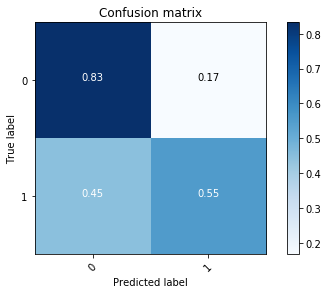

In [8]:
plot_confusion_matrixplot_con(cm=confusion_matrix(model.predict(X_test),y_test),
                              classes=y_test.unique(), normalize=True)

In [9]:
joblib.dump(model,'data/Models/Random forest.pkl')

['data/Models/Random forest.pkl']